<h1>Visualizations</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

with open("BikeRentalDaily_train.csv", "r",encoding="utf-8") as f:
    df = pd.read_csv(f, delimiter=";")

In [2]:
df[['instant', 'dteday']]

,instant,dteday
0,154,03.06.2011
1,685,15.11.2012
2,368,03.01.2012
3,472,16.04.2012
4,442,17.03.2012
...,...,...
595,78,19.03.2011
596,81,22.03.2011
597,377,12.01.2012
598,299,26.10.2011


For a better overview and prober working, we could sort instant ascending to get a chronical order of dtdays and then set instant to index

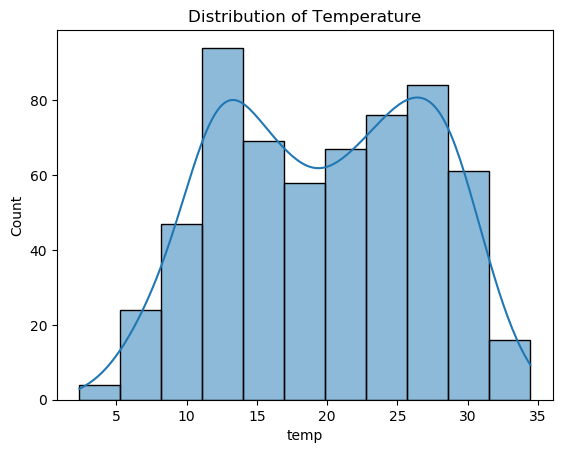

In [3]:
# Visualize the distribution of temperature
sns.histplot(df['temp'], kde=True)
plt.title('Distribution of Temperature')
plt.show()

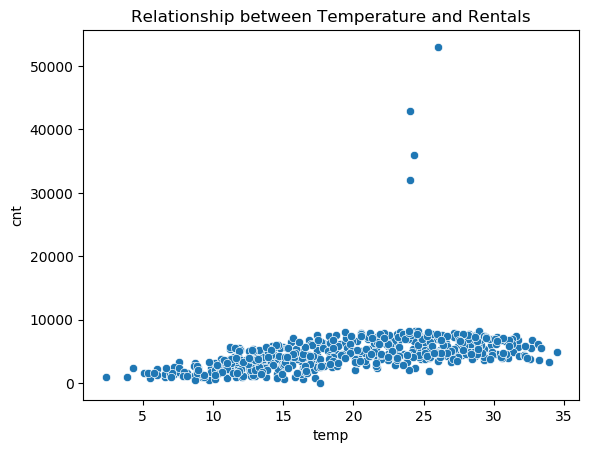

In [4]:
# Visualize the relationship between temperature and rentals (cnt)
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Relationship between Temperature and Rentals')
plt.show()

We notice 4 outliers in the 30-55k range

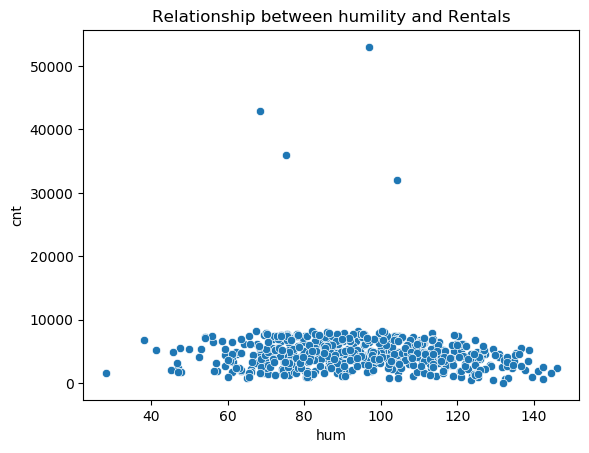

In [5]:
sns.scatterplot(x='hum', y='cnt', data=df)
plt.title('Relationship between humility and Rentals')
plt.show()

There are also 4 outliers in the 30-55k range

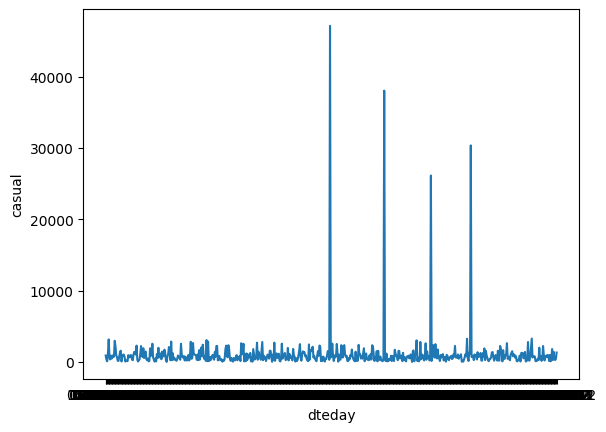

In [6]:
sns.lineplot(data=df, x="dteday", y="casual")

The outliers make it difficult to visualize the data properly - It would be good to scale some values like casual, registered and cnt


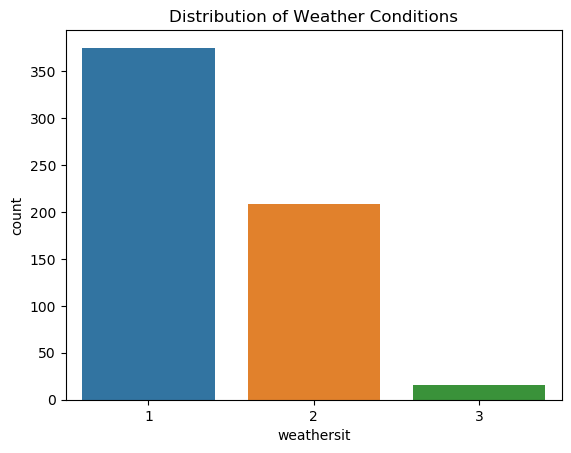

In [7]:
# Visualize the distribution of weather conditions
sns.countplot(x='weathersit', data=df)
plt.title('Distribution of Weather Conditions')
plt.show()

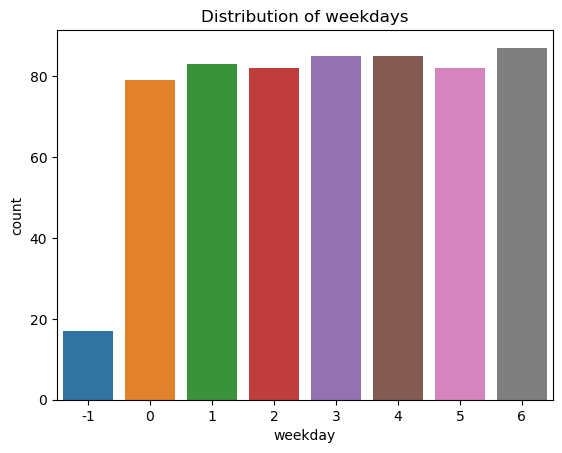

In [8]:
sns.countplot(x='weekday', data=df)
plt.title('Distribution of weekdays')
plt.show()

In [9]:
df_weekday_none = df[df['weekday']==-1].head()
df_weekday_none[["weekday","dteday"]]

,weekday,dteday
4,-1,17.03.2012
74,-1,08.11.2011
79,-1,12.11.2011
92,-1,09.11.2011
105,-1,10.11.2011


In [10]:
df_weekday_0 = df[df['weekday']==0].head()
df_weekday_0[["weekday","dteday"]]

,weekday,dteday
13,0,12.08.2012
17,0,30.01.2011
20,0,15.05.2011
26,0,09.01.2011
38,0,01.07.2012


It seems, as if there are given 8 weekdays, although there should be just 7. \
Aside from that, there are the numbers 0 and -1. 0 always represents the Sunday, but \
-1 is given at random dates, so it seems that in these instants, the weekday is not given and is euqal to NaN.

For the case that we are analysing the weekdays, it is important to fix these values, eclude or delete them.

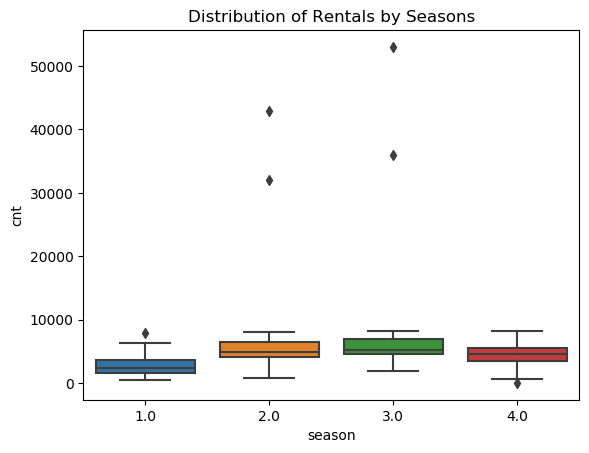

In [11]:
# Visualize the distribution of rentals in different seasons
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Distribution of Rentals by Seasons')
plt.show()

notice our 4 outliers again, these outliers could be removed to show a more detailed boxplot ?

<h1>Features to be transformed or removed</h1>

In [12]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
count,600.000000,538.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,566.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,363.116667,2.436803,0.496667,6.475000,0.03000,2.928333,0.680000,1.401667,19.808284,0.473620,93.845200,0.183696,740.065000,0.150000,1070.895000,3634.116667,4705.011667
std,208.711917,1.107240,0.500406,3.442741,0.17073,2.079360,0.466865,0.542360,7.206843,0.160439,21.380635,0.125257,164.430095,0.357369,2971.316154,1538.698254,3588.750428
min,1.000000,1.000000,0.000000,1.000000,0.00000,-1.000000,0.000000,1.000000,2.365200,0.079070,28.187550,-1.000000,459.000000,0.000000,2.000000,20.000000,22.000000
25%,181.250000,1.000000,0.000000,4.000000,0.00000,1.000000,0.000000,1.000000,13.575000,0.338256,77.328150,0.134335,600.750000,0.000000,313.000000,2499.000000,3135.000000
50%,362.500000,2.000000,0.000000,6.000000,0.00000,3.000000,1.000000,1.000000,20.100000,0.489690,93.256800,0.180971,737.000000,0.000000,722.000000,3657.000000,4530.000000
75%,538.250000,3.000000,1.000000,9.000000,0.00000,5.000000,1.000000,2.000000,26.058300,0.605127,109.921913,0.233947,875.500000,0.000000,1078.000000,4680.250000,5909.500000
max,731.000000,4.000000,1.000000,12.000000,1.00000,6.000000,1.000000,3.000000,34.466700,0.826371,145.875000,0.507463,1032.000000,1.000000,47138.000000,6946.000000,53021.000000


**Oberservations from the describe function**

-Max value of hum (humidity) is 145.87... if hum is measured in % that value is invalid
-The columns 'season' and 'hum' have missing values
-Windspeed has negative values
-weekday has negative values


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          600 non-null    int64  
 1   dteday           600 non-null    object 
 2   season           538 non-null    float64
 3   yr               600 non-null    int64  
 4   mnth             600 non-null    int64  
 5   holiday          600 non-null    int64  
 6   weekday          600 non-null    int64  
 7   workingday       600 non-null    int64  
 8   weathersit       600 non-null    int64  
 9   temp             600 non-null    float64
 10  atemp            600 non-null    float64
 11  hum              566 non-null    float64
 12  windspeed        600 non-null    float64
 13  leaflets         600 non-null    int64  
 14  price reduction  600 non-null    int64  
 15  casual           600 non-null    int64  
 16  registered       600 non-null    int64  
 17  cnt             

**Oberservations from the info function**

The 'dteday' column is of type 'object.' Depending on our analysis, we might want to convert it to a datetime format for better handling of date-related operations.



In [14]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap of the entire correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

TypeError: corr() got an unexpected keyword argument 'numeric_only'

<h2>Correlations</h2>

Strong Positive Correlations with 'cnt':
'casual' has a high positive correlation (0.906860). This suggests a strong positive relationship between the count of casual users and the overall count of rentals.
'registered' also has a relatively high positive correlation (0.581130). This indicates a strong positive relationship between the count of registered users and the overall count of rentals.

Moderate Positive Correlations with 'cnt':
'temp', 'atemp', and 'yr' have positive correlations around 0.38. This suggests a moderate positive relationship between temperature, feeling-like temperature, the year, and the overall count of rentals.

Moderate Negative Correlations with 'cnt':
'weathersit' has a moderate negative correlation (-0.184529). This suggests a moderate negative relationship between the weather situation and the overall count of rentals.

**Features with very low correlation with 'cnt' might not contribute much information and could be candidates for removal. In our case, features like 'leaflets', 'price reduction', 'holiday', 'weekday', 'workingday', and 'windspeed' have weak correlations.**

What suprises me here, is that price reduction has such a weak correlation (0.008591) on the count of rentals, which means that giving out discounts might be totally useless.

In [ ]:
df.isna().sum()

In [ ]:
# total count of missing values
print(df.isna().sum().sum(), 'values are missing')